<a name="cell-TOC-Estimation"></a> 

2. [Estimation](#cell-samplingIntegration)
  1. [Monte Carlo Integration](#cell-MCint)
      1. [Integral Estimation Accuracy [Central Limit Theorem (CLT)]](#cell-MCint-CLT)
  2. [Improving Estimation Efficiency](#cell-estimationEfficiency)
     1. [Importance Sampling](#cell-estimationEfficiency-ImportanceSampling)
     2. [Antithetic Sampling](#cell-estimationEfficiency-AntitheticSampling)
     3. [Control Variates](#cell-estimationEfficiency-ControlVariates)


<a name="cell-samplingIntegration"></a>

# 2. Estimation ([Return to TOC](#cell-TOC-Estimation))

---

If we are interesting in an **expected value**<br>*we actually are interested in computing an* ***integral***

$$ E_{X\sim f_\theta(x)}[g(x)] = \int g(x)f_\theta(x) dx = \int h(x) dx$$

***Sampling*** in the service of ***estimation*** of an **expected value**

$$\hat \theta \; \text{ estimating }\; E_X[g(x)] \quad \text{ also estimates } \quad \int h(x) dx$$

therefore also ***estimates*** the value of an **integral computation**


<a name="cell-MCint"></a>

## 2.A Monte Carlo Integration ([Return to TOC](#cell-TOC-Estimation))
---

$$\int_a^b \!\!\!\! f(u) \frac{1}{b-a} du = E_{U\sim \text{Uniform}(a,b)}[f(u)] \require{cancel}$$


\begin{align*}
\\
\text{So if}&&Y_i &={} f(U_i)(b-a) \quad \text{for} \quad U_i\sim \text{Uniform}(a,b) \\\\
\text{then}&& E_Y\left[Y_i\right] &={} \int_a^b \!\!\!\! f(u) \cancel{(b-a)}\frac{1}{\cancel{(b-a)}} du = \int_a^b \!\!\!\!f(u) du \\
\text{and}&& E_Y\left[Y_i\right] &={} \int_a^b \!\!\!\!f(u) du \quad \text{ is estimated by } \quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n}
\end{align*}


## 2.A Monte Carlo Integration 
---
Area of a quarter-circle is $\pi r^2/4$; so, drop uniformly random points in the square,<br>count proporion of "reds", $\require{cancel}\bar Y_n = \frac{\sum_{i=1}^n Y_i{\cancel{(a^1-b^0)}}}{n}$, and estimate $\hat \pi = 4 \bar Y_n$ (since $r=1$)


<table>
<tr>
<td>

![](https://enricodegiuli.files.wordpress.com/2017/05/pi_30k.gif?resize=500%2C500)
<!--https://en.wikipedia.org/wiki/Monte_Carlo_method-->
    
</td>
<td>
    
Or set $Y_i = f(U_i)$ to be the quarter circle<br>height over $[0,1]$ and use 
$\bar Y_n = \frac{\sum_{i=1}^n f(U_i)}{n}$
    

```python
import numpy as np
from scipy import stats
    
# r^2 = x^2 + y^2 
# so solving for y...
y = lambda x: np.sqrt(1-x**2)

n = 100000000
u = stats.uniform.rvs(size=n)
    
y(u).mean()*4
# 3.1416167096359295
```

</td>
</tr>
</table>




In [82]:
import numpy as np
from scipy import stats
# r^2 = x^2 + y^2 
# so solving for y...
y = lambda x: np.sqrt(1-x**2)
n = 100000000
u = stats.uniform.rvs(size=n)
y(u).mean()*4

3.141549766399787

<a name="cell-MCint-CLT"></a>

### 2.A.a Integral Estimation Accuracy [Central Limit Theorem (CLT)] 

---

\begin{align*}
\text{Integration}&\quad{} \displaystyle E[Y_i] = \int_a^b \!\!\!\!f(u) du \quad \text{ is estimated by } \quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n}\\
\color{gray}{\text{where}} &\quad{} \color{gray}{Y_i = (b-a)f(U_i) \; \text{ and } \; U_i\sim U(a,b)} \\
\end{align*}

Using the ***central limit theorem*** for $\bar Y_n$ estimating $E_Y[Y_i]$ then...<br>the accuracy of ***integral estimation*** of $\int_a^b \!\!f(u) du$ depends on the $\bar Y_n$ estimators ***standard error***

$$\bar Y_n \sim N\left(E[Y_i] = \int_a^b \!\!\!\! f(u)  du ,\frac{Var[Y]}{n} \right)
\quad \text{so } \quad  \frac{\bar Y_n - \int_a^b \!\!f(u) du}{\sqrt{\widehat{Var[Y]/n}}} \sim t_{n-1}$$

1. So, more Monte Carlo Samples $n$ improve accuracy by CLT
2. But also, the smaller $Var[Y]$ is the more accurate the estimation will be




<a name="cell-estimationEfficiency"></a>

## 2.B Improving Estimation Efficiency ([Return to TOC](#cell-TOC-Estimation))
---

What's the area under this curve? That is, the integral of the function over $[0,1]$ ?$\scriptsize \displaystyle \color{white}{ \int_0^1}$<!--${\rm I\!R}^+$?-->


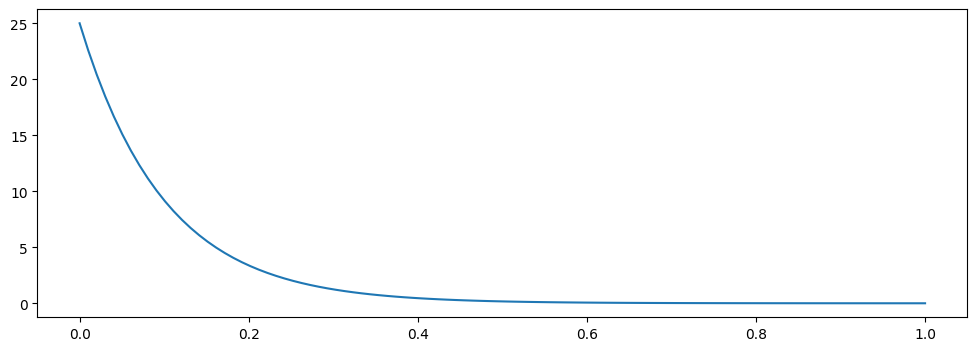

In [81]:
import numpy as np; import matplotlib.pyplot as plt
x=np.linspace(0,1,100); plt.figure(figsize=(12,4)); plt.plot(x, 25*np.exp(-10*x));


## 2.B Improving Estimation Efficiency 

--- 

What's the area under this curve? That is, what is the value of $\scriptsize \displaystyle \int_0^1 25e^{-10u} du$ ?


In [83]:
import numpy as np; from scipy import integrate # Integral Approxiation rather than Estimation...
f = lambda x: 25*np.exp(-10*x) # STA410_W24_Week2_Extra_QuadratureIntegralApproximation.ipynb
ApproximatedArea,NumericalPrecision = integrate.quad(f, 0, 1); print("Approximated Area", ApproximatedArea, "Numerical Precision", NumericalPrecision)

Approximated Area 2.4998865001755934 Numerical Precision 7.081697859009796e-14


In [84]:
from scipy import stats
n = 1000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.3005771649023528 Standard Error 0.14572635574730275


In [85]:
n = 100000000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.5005050328811094 Standard Error 0.0005000460137289087



## 2.B Improving Estimation Efficiency 
---

These integrals are equivalent (by [the law](https://math.stackexchange.com/questions/415196/proving-the-law-of-the-unconscious-statistician) of the [unconscious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician)):

$$\scriptsize E_{X\sim \text{uniform}(0, 1)}\left[25e^{-10x}\right] = \int_0^1 5e^{-5x}\times \frac{\int_0^1 5e^{-5x}dx}{\int_0^1 5e^{-5x}dx}\times 5e^{-5x} dx =  E_{X\sim \text{truncexpon}(5, 1)}\left[5e^{-5x}\times \int_0^1 5e^{-5x}dx\right]$$ 


In [93]:
n = 100000; print(np.var(stats.expon(scale=1/5).pdf(stats.truncexpon(5, scale=1/5).rvs(size=n))), end=' '); print("is much less than", end=' ')
print(np.var(stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2)); 
print("\nThe variance of 'samples' of PDF evaluations when sampling proportionally to the function being evaluated")
print("is much less than the variance of 'samples' of PDF evaluations drawn uniformly over the function support...")

2.0541569042334573 is much less than 25.19192906498506

The variance of 'samples' of PDF evaluations when sampling proportionally to the function being evaluated
is much less than the variance of 'samples' of PDF evaluations drawn uniformly over the function support...


- Look at the function again... the tail decays very quickly...
- Small valued pdf evalaution values close to $0$ are not representative of 'sample' pdf evaluations... they are 'extreme values'... that should only be included proportionally.
- Proportional sampling minimizes unnecessary variance inflating 'extreme value' 0's.


## 2.B Improving Estimation Efficiency 
---

- Sampling is now exactly proportional to the function being evaluated
- This reduces $\sigma_{f(U)}$ rather than increasing $n$ to reduce the **standard error** $\frac{\hat{\sigma}_{f(U)}}{\sqrt{n}}$


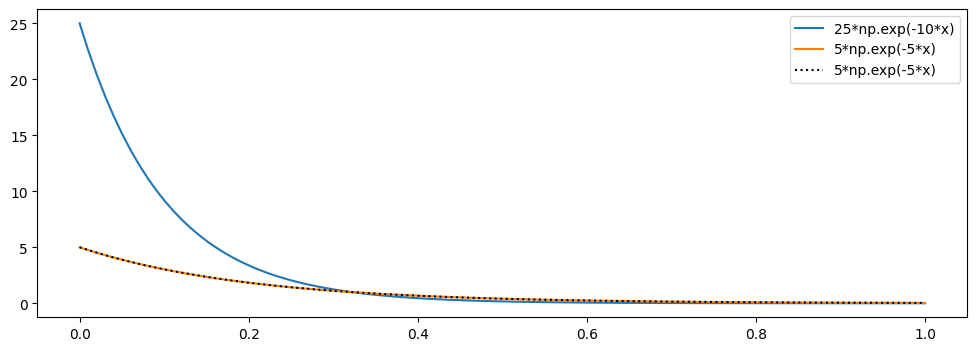

In [80]:
import numpy as np; import matplotlib.pyplot as plt
x=np.linspace(0,1,100); plt.figure(figsize=(12,4)); plt.plot(x, 25*np.exp(-10*x), label='25*np.exp(-10*x)'); plt.plot(x, 5*np.exp(-5*x), label='5*np.exp(-5*x)'); plt.plot(x, 5*np.exp(-5*x), 'k:', label='5*np.exp(-5*x)'); plt.legend(); 


## 2.B Improving Estimation Efficiency 
---

- Sampling is now exactly proportional to the function being evaluated
- This reduces $\sigma_{f(U)}$ rather than increasing $n$ to reduce the **standard error** $\frac{\hat{\sigma}_{f(U)}}{\sqrt{n}}$


In [142]:
from scipy import stats
n = 100000000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.4995598426273196 Standard Error 0.0004999364537036303


In [166]:
n = int(n/10); y = 5*np.exp(-5*stats.truncexpon(5, scale=1/5).rvs(size=n))*stats.expon(scale=1/5).cdf(1)
ybar,StandardError = y.mean(), (y.var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.5005338741158316 Standard Error 0.0004503478023051634


In [109]:
import numpy as np; from scipy import integrate # Integral Approxiation rather than Estimation...
f = lambda x: 25*np.exp(-10*x) # STA410_W24_Week2_Extra_QuadratureIntegralApproximation.ipynb
ApproximatedArea,NumericalPrecision = integrate.quad(f, 0, 1); print("Approximated Area", ApproximatedArea, "Numerical Precision", NumericalPrecision)

Approximated Area 2.4998865001755934 Numerical Precision 7.081697859009796e-14


## 2.B Improving Estimation Efficiency 
---

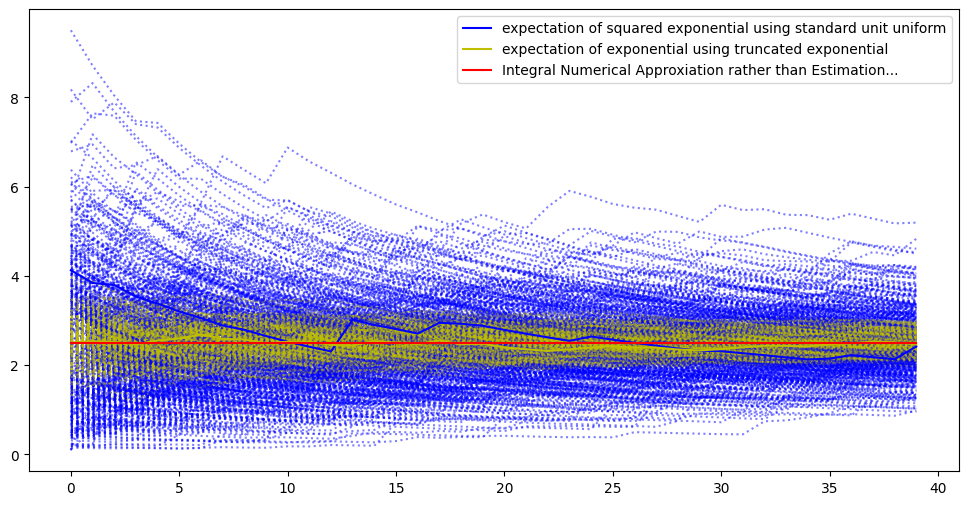

In [ ]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np; from scipy import integrate
plt.figure(figsize=(12,6)); n = 50
for i in range(500):
  mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], 'b:', alpha=0.5)
  mcint = (5*np.exp(-5*(stats.truncexpon(5, scale=1/5).rvs(size=n)))*stats.expon(scale=1/5).cdf(1)); mcint = mcint.cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], "y:", alpha=0.5)  
mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], c='b', label="expectation of squared exponential using standard unit uniform")
mcint = (5*np.exp(-5*(stats.truncexpon(5, scale=1/5).rvs(size=n)))*stats.expon(scale=1/5).cdf(1)); mcint = mcint.cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], c='y', label="expectation of exponential using truncated exponential"); plt.plot((n-10)*[integrate.quad(lambda x: stats.expon(scale=1/5).pdf(x)**2, a=0,b=1)[0]], c='red', label="Integral Numerical Approxiation rather than Estimation..."); plt.legend();

## 2.B Improving Estimation Efficiency 
---
For $x_i \sim p_X$

$$ \hat \theta = \sum_{i=1}^n\frac{g(x_i)}{n} \quad \textbf{ estimates } \quad \theta = \text{E}_{X\sim p}[g(X)] = \int \frac{f(x)}{p(x)}p(x) dx $$

And if $p(x_i) = f(x_i)/\theta$

\begin{align*}
\widehat{\text{Var}}_{X\sim p_X}\left[g(X) \right] =
\frac{1}{n} \sum_{i=1}^n \left( g(x_i) - \text{E}_{X\sim p_X}\left[ g(x_i) \right] \right)^2 &={} 
\frac{1}{n} \sum_{i=1}^n  \left( \frac{f(x_i)}{p(x_i)} - \theta \right)^2\\&={} 0
\end{align*}

suggesting integral estimation is optimal when sampling from $p(x_i)$ proportional to $f(x_i)$ 



<a name="cell-estimationEfficiency-ImportanceSampling"></a>

### 2.B.a Importance Sampling ([Return to TOC](#cell-TOC-Estimation))
---

While statisticians might be interested in ***inverse CDF***,  ***rejection***, and ***importance sampling*** in their own right, these (and other general) **sampling** methods are also of interest in terms of increasing computational efficiency of $\int \!\!f(x) dx = \int \!\!g(x)p(x) dx = E_{X\sim p(X)}[g(X)]$ integral estimation by providing sampling from $p(x) \propto |g(x)|$ <span style="color:Gray;">which as seen  benefits efficiency...</span>

When the natural factorization $g(x)p(x)$ does not immediately lend itself  directly to $p(x) \propto |g(x)|$, ***importance sampling*** instead identifies a ***proposal distribution*** $\tilde p(x) \propto \left|g(x)\right|$ 
<span style="color:Gray;">or better yet $\tilde p(x) \propto \left|g(x) \frac{p(X)}{\tilde p(X)} \right|$</span>
and then corrects estimation with **importance weights** $\frac{p(x)}{\tilde p(x)}$. 

$$\text{So then } \quad \scriptsize E_{X\sim p(X)}[g(X)] = \int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx = E_{X\sim p(\tilde X)}\left[g(X) \frac{p(X)}{\tilde p(X)} \right]$$

$$\text{is estimated by } \quad \frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \quad \text{ for } \quad w_i^*=\frac{p(x_i)}{\tilde p(x_i)} \quad \text{ for } \quad x_i \sim p_{\tilde X}$$


### 2.B.a Importance Sampling 
---

$$E_{X\sim p(X)}[g(X)] = \int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx = E_{X\sim p(\tilde X)}\left[g(X) \frac{p(X)}{\tilde p(X)} \right]$$

can be estimated using ***importance sampling*** or ***normalized importance sampling*** as either

$$\frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \overset{or}{\approx} \sum_{i=1}^n w_ig(x_i) \; \text{ with } \; w_i^*=\frac{p(x_i)}{\tilde p(x_i)} \; \text{ or } \; w_i = \frac{w_i^*}{\sum_{i=1}^n w_i^*} \; \text{ for } \; x_i \sim p_{\tilde X}$$
 
---

$\displaystyle \text{Var}_{\tilde p(X)}\left[\frac{1}{n} \sum_{i=1}^n W_i^*g(X_i) \right] \;\;\; \begin{array}{c}\text{estimated}\\\text{as}\end{array} \;\;\; \frac{1}{n}\sum_{i=1}^{n}\frac{1}{n-1}\left(w_i^*g(x_i) - \frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \right)^2$


$\displaystyle \text{Var}_{\tilde p(X)}\left[ \sum_{i=1}^n W_ig(X_i) \right] \quad \begin{array}{c}\text{estimated by the}\\\text{delta method as}\end{array} \quad \sum_{i=1}^{n}w_{i}^{2}\left(g(x_i) - \sum_{i=1}^n w_ig(x_i) \right)^2$


### 2.B.a Importance Sampling 
---

***Importance sampling*** and ***normalized importance sampling***  estimation of

$$\scriptsize E_{X\sim p(X)}[g(X)] = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx \quad \text{ with } \quad \frac{1}{n}\sum_{i=1}^n \underset{w_i=p(x)/\tilde p(x)}{w_i^*g(x_i)\;\;} \overset{or}{\approx} \sum_{i=1}^n \underset{w_i = w_i^*/\sum_{i=1}^n w_i^*}{{w_i}g(x_i)\quad\;\;}$$

effectively reduce sampling variance by choosing $\tilde p(x)$ which  

1. has heavier tails than $p(x)$ so ***importance weights*** don't explode $\left(\require{cancel}w_i^* = \frac{p(x_i)}{\tilde p(x_i)}\cancel{>>}0\right)$<br><span style="color:Gray;">[and subsequently cause ***normalized importance weights*** to vanish $w_j\approx 0$]</span>

2. does not sample $x$ where $g(x)\approx 0$ or  $w_i^* \approx 0$ or $w_i \approx 0$ (due to some $w_j^*>>0$)

**so the range of evalutions of $\left(g(x) \frac{p(x)}{\tilde p(x)} \right)$ <span style="color:Gray;">and $w_i^* g(x_i)$ and $w_i g(x_i)$</span> 'samples' is restricted to reduce their variance by (1) bounding them from above and (2) bounding them above $0$.**


### 2.B.a Importance Sampling 

---

The ***normalized importance sampling*** estimator $ \sum_{i=1}^n w_ig(x_i)$ can be viewed as<br>a "sum of areas" approximation to the $\;\;E_{X\sim p(X)}[g(X)] = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx \;\;$ **integral**. 

- It costs "one addition step" to 
    - add an area to the summation that relevantly contributes to the integral<br>(because it's a non-negligable area)
- <span style="color:Gray;">It also costs "one addition step" to pointlessly</span>
    - add an area to the summation that's irrelevant for the integral with area $\approx 0$
    
Adding evaluations where $w_ig(x_i)\approx 0$ into the summation is a waste...

Sampling from $\tilde p(x) \propto |g(x)|$ oversamples $g(x)$ where it most contributes to the integral so it is more efficiently estimated, while the ***normalized importance weights*** based on $\frac{p(x)}{\tilde p(x)}$ retroactively adjust to correct this oversampling to maintain the desired expected value.

### 2.B.a Importance Sampling 
---

For a posterior distribution $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$, the posterior probability

$$\Pr(0.95 < \theta < 0.99 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[.95,.99]}(\theta)] = \int 1_{[.95, .99]}(\theta) p(\theta|\mathbf{x}) d\theta$$

will not be most efficiently calculated by naively basing estimation on samples from $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$. Instead, ***importance sampling*** can bias sampling for more efficient integral estimation using $\tilde p(x) \propto g(x)$ such that $\text{Var}_{\tilde p(X)}\left[g(X) \frac{p(X)}{\tilde p(X)}\right] < \text{Var}_{p(X)}\left[g(X)\right]$.

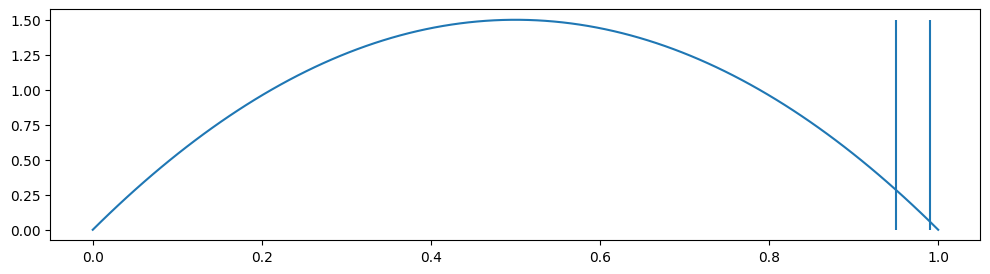

In [363]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
support = np.linspace(0,1,100); plt.figure(figsize=(12,3)); plt.plot(support, stats.beta(2,2).pdf(support), label="Beta(2,2)"); plt.vlines([.95,.99], ymin=0, ymax=1.5);

### 2.B.a Importance Sampling 
---

***Importance sampling*** allows for oversampling of $g(x)$ where it dominates $\int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx$ so the function is more precisely represented in its most relevant areas, but subsequantly appropriately downweighted for oversampling by $\frac{p(x)}{\tilde p(x)}$ to keep the correct expected value.


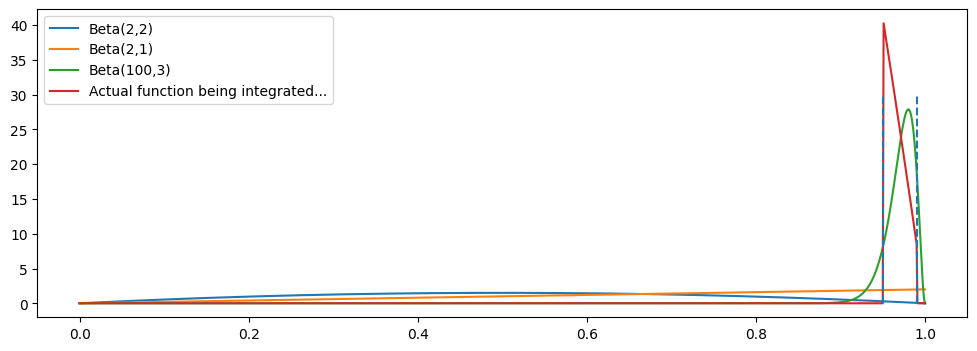

In [573]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
def region(x, a=.95,b=.99): return (x>a)&(x<b)
support = np.linspace(0,1,1000); plt.figure(figsize=(12,4)); plt.plot(support, stats.beta(2,2).pdf(support), label="Beta(2,2)"); plt.plot(support, stats.beta(2,1).pdf(support), label="Beta(2,1)"); plt.plot(support, stats.beta(100,3).pdf(support), label="Beta(100,3)"); plt.plot(support, stats.beta(2,2).pdf(support)*region(support)/(stats.beta(2,2).cdf(.99)-stats.beta(2,2).cdf(.95)), label="Actual function being integrated..."); plt.vlines([.95,.99], linestyle='dashed', ymin=0, ymax=30); plt.legend()

### 2.B.a Importance Sampling 

---

More efficient estimation of $\scriptsize \Pr(0.95 < \theta < 0.99 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[.95,.99]}(\theta)] = \int 1_{[.95, .99]}(\theta) p(\theta|\mathbf{x}) d\theta$<br>by targetted oversampling based on ***importance sampling***.


In [317]:
X = stats.beta(2,2); tilde_X = stats.beta(2,1); #tilde_X = stats.beta(100,3)
n = 1000; x = X.rvs(size=n); tilde_x = tilde_X.rvs(size=n) 
w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x); w = w_/w_.sum() 
def region(x, a=.95,b=.99):
  return (x>a)&(x<b)
print("The Analytical Truth is:", np.round(X.cdf(.99)-X.cdf(.95), 5)); 
print("Naive Beta(2,2) Samples:", np.mean(region(x)), end=' '); 
print("  (SE:", np.round((np.var(region(x))/n)**0.5, 5), end=')\n')
print("    Importance Sampling:", np.round(np.mean(region(tilde_x)*w_),5), end=' '); 
print("(SE:", np.round((np.var(region(tilde_x)*w_)/n)**0.5, 5), end=')\n')
print("Importance Sampling(V2):", np.round((w*region(tilde_x)).sum(),5), end=' ')
print("(SE:", np.round( (((w*(region(tilde_x)-(w*region(tilde_x)).sum()))**2).sum())**0.5, 5), end=')\n')
print("(Normalized Weights)") 
# NOT (np.var(region(tilde_x))*(w**2).sum())**0.5 as in https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
# -> sum_i g(x_i)*(w_i/sum(w_)) is a ratio of random variables: https://artowen.su.domains/mc/Ch-var-is.pdf

The Analytical Truth is: 0.00695
Naive Beta(2,2) Samples: 0.007   (SE: 0.00264)
    Importance Sampling: 0.00599 (SE: 0.00074)
Importance Sampling(V2): 0.00617 (SE: 0.00082)
(Normalized Weights)


<a name="cell-estimationEfficiency-AntitheticSampling"></a>

### 2.B.b Antithetic Sampling  ([Return to TOC](#cell-TOC-Estimation))

---

Efficient integral estimation with ***importance sampling*** biases evaluations on the most relevant (non-zero) regions of the integration (and adjusts to maintain the expected value). 

- How about leveraging available correlations present in collections of estimators?

Suppose $\bar x_1$ and $\bar x_2$ have $E[\bar x_1] = E[\bar x_2] = \theta$ and correlation $\rho = \frac{Cov(\bar x_1+\bar x_2)}{\sigma_{\bar x_1}\sigma_{\bar x_2}}$. 

If (for simplicity) $\sigma_{\bar x_1}^2=\sigma_{\bar x_2}^2=\frac{\sigma^2}{n}$ then 


$$
\begin{align*}
\text{Var}\left(\frac{\bar x_1+\bar x_2}{2}\right) = {} & \frac{\text{Var}(\bar x_1)+\text{Var}(\bar x_2)}{4} + \frac{2\text{Cov}(\bar x_1+\bar x_2)}{4} \\
= {} & \frac{\sigma^2}{2n} + \frac{\frac{\sigma}{\sqrt{n}}\frac{\sigma}{\sqrt{n}}\rho}{2} = \frac{(1+\rho)\sigma^2}{2n}
\end{align*}$$



### 2.B.b Antithetic Sampling 

---

If $\rho<0$ then 
$\text{Var}\left(\frac{\bar x_1+\bar x_2}{2}\right) = \frac{(1+\rho)\sigma^2}{2n}$
is less than $\text{Var}(\bar x_1)$ and $\text{Var}(\bar x_2)$.

Achieving $\rho<0$ (and potentially a substantially lower estimation variance) can be easy... 

- $\rho_{\bar x_1,\bar x_2} < 0$ if $x_{2i} = -x_{1i}$ for $x_{1i}\sim N(\mu, \sigma^2)$
- $\rho_{\bar x_1,\bar x_2} < 0$ if $x_{2i} = 1-x_{1i}$ for $x_{1i}\sim U(0,1)$

***Antithetic sampling*** is similar to ***Bagging*** in ***Random Forests*** where for tree-based precictions $t_k, j=1,\cdots, K$ with common variance $\sigma^2_{t}$ and shared correlation $\rho = \frac{Cov(t_k,t_{k'})}{\sigma^2_{t}}$

$$
Var(\bar t) = \frac{1}{K^2} \sum_{k=1}^K \sigma^2_t + \frac{2}{K^2} \sum_{k,k'} \sigma_t^2 \rho = \frac{\sigma^2}{K} + \frac{\frac{2}{2}(K^2-K)\sigma_t^2\rho}{K^2}
 = \rho \sigma^2 + \frac{(1-\rho)\sigma^2}{K}
$$

where gains from averaging for even positively correlated estimators will be beneficial.

<!-- = \frac{\sigma^2}{K} + \sigma_t^2\rho - \frac{\sigma_t^2\rho}{K} -->

### 2.B.b Antithetic Sampling 

---

Here's we combine add ***antithetic sampling*** and ***importance sampling*** to our previous problem

$$\Pr(0.95 < \theta < 0.99 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[.95,.99]}(\theta)] = \int 1_{[.95, .99]}(\theta) p(\theta|\mathbf{x}) d\theta$$

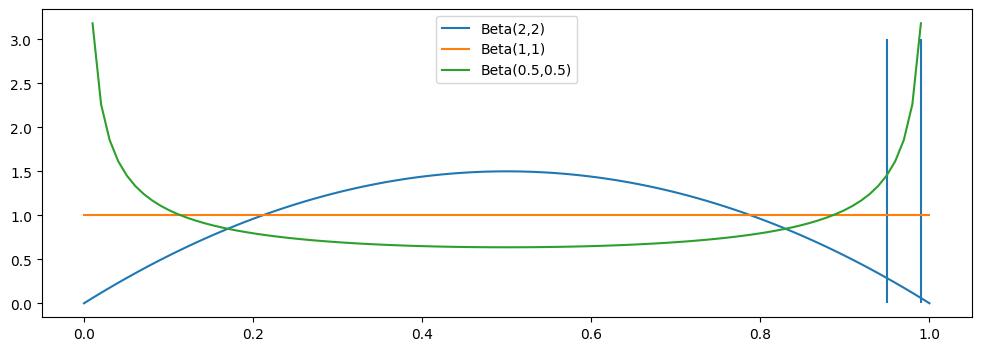

In [325]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
support = np.linspace(0,1,100); plt.figure(figsize=(12,4)); plt.plot(support, stats.beta(2,2).pdf(support), label="Beta(2,2)"); plt.vlines([.95,.99], ymin=0, ymax=3); plt.plot(support, stats.beta(1,1).pdf(support), label="Beta(1,1)"); plt.plot(support, stats.beta(0.5,0.5).pdf(support), label="Beta(0.5,0.5)"); plt.legend()

### 2.B.b Antithetic Sampling 

---

Here's we combine add ***antithetic sampling*** and ***importance sampling*** to our previous problem

$$\Pr(0.95 < \theta < 0.99 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[.95,.99]}(\theta)] = \int 1_{[.95, .99]}(\theta) p(\theta|\mathbf{x}) d\theta$$

In [389]:
from scipy import stats; import numpy as np
X = stats.beta(2,2); tilde_X = stats.beta(0.5, 0.5); # stats.uniform()
n = 1000; tilde_x = tilde_X.rvs(size=n); w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)
print("The Analytical Truth is:", np.round(X.cdf(.99)-X.cdf(.95), 5)) 
def region(x, a=.95,b=.99):
  return (x>a)&(x<b)
print("    Importance Sampling:", np.round((w_*region(tilde_x)).mean(),5), end=' ') 
print("(SE:", np.round((np.var(region(tilde_x)*w_)/n)**0.5, 5), end=')\n')
print("Antithetical Sampling +"); tilde_x_1 = w_*region(tilde_x); tilde_x_2 = w_*region(1-tilde_x)
print("    Importance Sampling:", np.round(0.5*(tilde_x_1.mean()+tilde_x_2.mean()),5), end=' ')
# Here's one way to estimate the variance of the Antithetical Sampling estimate
tilde_xs_var = 0.25*(np.var(tilde_x_1)/n + np.var(tilde_x_2)/n + (2/n**2)*np.cov(tilde_x_1, tilde_x_2)[0,1])
print("(SE:", np.round(tilde_xs_var**0.5, 5), end=')\n')
# This is better than the previously considered importance sampling alone... if you go look...

The Analytical Truth is: 0.00695
    Importance Sampling: 0.00774 (SE: 0.00091)
Antithetical Sampling +
    Importance Sampling: 0.00695 (SE: 0.0006)


<a name="cell-estimationEfficiency-ControlVariates"></a>

### 2.B.c Control Variates ([Return to TOC](#cell-TOC-Estimation))

---

So far we've seen biasing sampling towards more informative evaluations and leveraging correlated estimators reduce estimation variance and hence lower computational demand., 

Taking this further, we can even leverage unrelated but correlated estimators

$$E[\hat \theta] = \theta  \not = \lambda = E[\hat \lambda] \quad \text{ so long as } \quad \lambda \text{ and } Cov(\hat \theta, \hat \lambda) \text{ are known}$$

since if $Cov(\hat \theta, \hat \lambda)>0$, then $\hat \lambda > \lambda$ suggests $\hat \theta > \theta$ (and $\hat \lambda < \lambda$ suggests $\hat \theta < \theta$), etc...

Under such conditions, the estimator $\quad \hat \theta + \underset{- \text{ when } \hat \lambda > \lambda}{\overset{+ \text{ when } \hat \lambda > \lambda}{\beta (\hat \lambda-\lambda)}} \quad$ of $\theta$ can be used<br>with $\beta$ can be chosen to optimally reduced variance as shown on the next slide.


### 2.B.c Control Variates ([Return to TOC](#cell-TOC-Estimation))

---

\begin{align*}
\text{Var}\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) ={} & \overbrace{\text{Var}\left(\hat \theta \right) + \beta^2 \text{Var} (\hat \lambda) + 2 \beta \text{Cov}\left(\hat \theta, \hat \lambda \right)}^{\frac{\partial}{\partial \beta} Var\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) \,=\, 0 \; \Rightarrow \; 2\beta \text{Var}(\hat \lambda ) +2 \text{Cov}(\hat \theta, \hat \lambda) \,=\,0} \\
= {} & \; \text{Var}\left(\hat \theta \right) + \left(-\frac{\text{Cov}(\hat \theta, \hat \lambda)}{\text{Var}\left(\hat \lambda \right)}\right)^2 Var\left(\hat \lambda \right) - 2\frac{\text{Cov}(\hat \theta, \hat \lambda)}{\text{Var}\left(\hat \lambda \right)}\text{Cov}(\hat \theta, \hat \lambda) \\
= {} & \;  \text{Var}\left(\hat \theta \right) - \frac{\left(\text{Cov}(\hat \theta, \hat \lambda)\right)^2}{\text{Var}\left(\hat \lambda \right)} < \text{Var}\left(\hat \theta \right)
\end{align*}

with $\beta = - \frac{\widehat{\text{Cov}}[\hat \theta, \hat \lambda]}{\widehat{\text{Var}}[\hat \lambda]}$ found by solving to minimize variance for the $\hat \theta + \beta (\hat \lambda-\lambda)$ estimator.

---

When many auxiliary estimators are available, many ***control variates*** can be used simultaneously as a sort of "multiple linear regression" of the form $\hat \theta + \sum_{k=0}^K \beta (\hat \lambda_k-\lambda_k)$




### 2.B.c Control Variates 

---

For ***importance sampling***, $E[W_i^*] = 1$ so a ***control variate*** estimator can be constructed as 
$\overline{W^*Y} + \beta (\overline{W^*}-1)$ adding a bias of $\mathcal{O}(\frac{1}{n})$; but outperforming $\overline{W^*Y}$ MSE for large $n$.

In [557]:
from scipy import stats; import numpy as np # E[W*] = 1; control variate estimator \bar{w*y} + \beta (\bar{w*} - 1)
X = stats.beta(2,2); tilde_X =  stats.beta(2,1)# stats.beta(100,3)# stats.uniform()#
n = 1000; tilde_x = tilde_X.rvs(size=n); w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)
print("The Analytical Truth is:", np.round(X.cdf(.99)-X.cdf(.95), 5)) 
def region(x, a=.95,b=.99): return (x>a)&(x<b)
print("    Importance Sampling:", np.round((w_*region(tilde_x)).mean(),5), end=' ') 
print("(SE:", np.round((np.var(region(tilde_x)*w_)/n)**0.5, 5), end=')\n')
beta = -np.cov(w_*region(tilde_x), w_, ddof=1)[0,1]/np.var(w_, ddof=1); print("Control Variates +")
print("    Importance Sampling:", np.round((w_*region(tilde_x)).mean() + (w_.mean()-1)*beta,5), end=' ') 
tilde_cv_var = np.var(w_*region(tilde_x), ddof=1) + beta**2*np.var(1-w_, ddof=1) + \
               2*beta*np.cov(w_*region(tilde_x), w_, ddof=1)[0,1] # = np.var(w*region(tilde_x), ddof=1) - np.cov(w*region(tilde_x), w, ddof=1)[0,1]**2/np.var(w, ddof=1)
print("(SE:", np.round((tilde_cv_var/n)**0.5, 5), end=')'); print(" [", np.round((w_.mean()-1),5), "Control Variate;", np.round(beta,5), "beta;", np.round(np.cov(w_*region(tilde_x), w_, ddof=1)[0,1],5), "Cov ]" )

The Analytical Truth is: 0.00695
    Importance Sampling: 0.00732 (SE: 0.00084)
Control Variates +
    Importance Sampling: 0.00755 (SE: 0.00079) [ 0.01745 Control Variate; 0.01324 beta; -0.00668 Cov ]


*This example is inspired by Example 6.12 on page 190 in Chapter 6.4 **Variance Reduction Techniques** of the Givens and Hoeting **Computational Statistics** textbook*.


<!--
since **importance weights** have $E[W_i^*] = E_{X \sim \tilde p(X)}\left[\frac{p(X)}{\tilde p(X)}\right] = 1$<br>so the ***normalized importance weights*** $W_i = \frac{W_i^*}{\sum_{i=1}^n W_i^*}$ have $E[W_i^*] = \frac{1}{n}$ -->
